<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 30px; ">Tutoriel d'exemple de résolution d'un problème de machine learning </h1>
</div>

## <div align="center">Problématique étudiée</div>

### <div align="center">L’objectif sera de prédire le prix des maisons (variable expliquée) grâce aux différentes informations présentes dans le jeu de données (variables explicatives)..</div> 
La problématique étudiée est le cas avec le dataset "California housing DataSet". L'objectif de ce cas est de reconnaître des chiffres annotés à la main à partir d'une base de données disponible..

Ce notebook va vous guider à travers ce cas concret de classification, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : le régression linéaire. Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

 ## <div align="center">Importation des différentes librairies.</div>

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


 ## <div align="center">Importation des datasets.</div>

In [83]:
from sklearn.datasets import fetch_california_housing

 ## <div align="center">Préparation des donées</div>

On transforme notre jeu de données en un data frame.

In [84]:
california_housing = fetch_california_housing(as_frame=True)
california_housing_df = california_housing.frame
california_housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


 ## <div align="center">Création du modèle</div>

Avant de créer notre modèle on se rend compte qu’on a des variables explicatives pour le Prix
 Ainsi si on veut être malin on se pose les questions suivantes : dois-je choisir toutes ces variables pour mon modèle ? Quelles sont les variables qui ont une forte relation linéaire avec la variable ‘PRIX’. Pour répondre à ces interrogations on va faire une matrice de corrélation.

Les coefficients de corrélation se situent dans l’intervalle [-1,1].
– si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
– si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
– si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation.

 ### <div align="center">Régression Linéaire- matrice de confusion</div>

<AxesSubplot:>

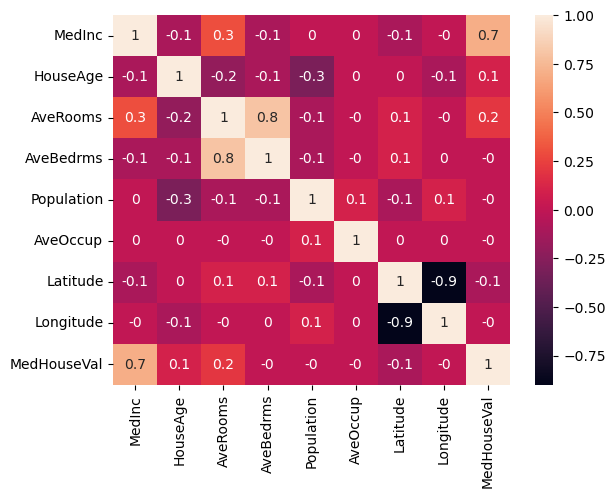

In [85]:
#etude de la correlation
matrice_corr = california_housing_df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

### nous divisons notre jeu de données d'entrée en deux sous-ensembles, afin de constituer nos jeux de données d'apprentissage (constitué ici de 70 % des données de départ), et de test (30 % des données de départ).

In [86]:

train, test = train_test_split(california_housing_df, test_size=0.3)
x_train = train.drop(columns=["MedHouseVal"])
y_train = train["MedHouseVal"]
x_test = test.drop(columns=["MedHouseVal"])
y_test = test["MedHouseVal"]

 ### <div align="center">l’entrainement du modèle</div>

In [87]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)


LinearRegression()

 ### <div align="center">Évaluation du modèle de régression linéaire</div>

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [88]:
y_train_predict = regr.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.7154261401199102
le score R2 est 0.6152545734820187




In [89]:
# model evaluation for testing set
y_test_predict = regr.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 0.7470750649263377
le score R2 est 0.5817415037430242


### Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !
